In [53]:
import pandas as pd
import random as rnd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [54]:
#ML tools:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Construction DB creation for ML training:

In [61]:
#Creating Dataframes from Dicts using random normal distribution.
#Note that new observations are batch-generated in controlled packs of typical case studies.
#Each centre of the distribution and each standard deviation are controlled and 
#assigned intentionally by a construction manager (the one who is scripting). 
#We trust this expert data to furher enrich the DataBase rather than adding innecessary noise.

cons0_aisl=pd.DataFrame.from_dict({'modul_price':np.random.normal(910,375,600), 
                        "weeks_delay":np.random.normal(7,22,600),
                        "weeks_duration":np.random.normal(30,20,600),
                        "built_area": np.random.normal(125,350,600)})

cons1_med=pd.DataFrame.from_dict({'modul_price':np.random.normal(750,220,1000), 
                        "weeks_delay":np.random.normal(36,20,1000),
                        "weeks_duration":np.random.normal(65,31,1000),
                        "built_area": np.random.normal(5800,3300,1000)})

cons2_peq=pd.DataFrame.from_dict({'modul_price':np.random.normal(810,275,500), 
                        "weeks_delay":np.random.normal(19,11,500),
                        "weeks_duration":np.random.normal(65,31,500),
                        "built_area": np.random.normal(3800,2029,500)})

cons3_gran=pd.DataFrame.from_dict({'modul_price':np.random.normal(600,220,200), 
                        "weeks_delay":np.random.normal(10,15,200),
                        "weeks_duration":np.random.normal(63,20,200),
                        "built_area": np.random.normal(8100,2200,200)})

cons4_gran=pd.DataFrame.from_dict({'modul_price':np.random.normal(720,193,1200), 
                        "weeks_delay":np.random.normal(23,10,1200),
                        "weeks_duration":np.random.normal(62,20,1200),
                        "built_area": np.random.normal(13300,5081,1200)})

const_tot = pd.concat([cons0_aisl,cons1_med, cons2_peq, cons3_gran,cons4_gran])

#Let's sweep away negative values and other absurd values.
const_tot = const_tot[(const_tot["weeks_duration"]>13 )& (const_tot["built_area"]>50)                       
                      & (const_tot['modul_price']>181) & (const_tot["weeks_delay"]>=0)]

#Weeks to integer type:
const_tot.weeks_duration= const_tot.weeks_duration.astype(int)
const_tot.weeks_delay= const_tot.weeks_delay.astype(int)

#reset index:
const_tot=const_tot.reset_index().drop("index",axis=1)
                                  
const_tot.head(7)


,built_area,modul_price,weeks_delay,weeks_duration
0,732.258075,729.940173,5,69
1,128.265586,1436.129188,49,42
2,888.617513,999.617130,31,23
3,208.201187,1467.667735,11,28
4,199.909731,860.977718,3,55
5,429.968517,1207.816082,22,35
6,259.021388,976.727344,5,54


In [62]:
#Asigning building typologies to a new column with an expert randomizer:

## Expert randomizer:

rand90=[True,True,True,True,True,True,True,True,True,False]
rand80=[True,True,True,True,True,True,True,True,False,False]
rand60=[True,True,True,True,True,True,False,False,False,False]
rand10=[True,False,False,False,False,False,False,False,False,False]

edif=["DETACHED" if (n <250) and (True in rnd.sample(rand90,1)) else      
      "DETACHED" if (250<n<450) and (True in rnd.sample(rand80,1)) else
      "COLLECTIVE" if (450<n<3200) and (True in rnd.sample(rand60,1)) else      
      "COMMERCIAL" if (7000<n<35000) and (True in rnd.sample(rand10,1)) else
      "COMMERCIAL" if (4000<n<15000) and (True in rnd.sample(rand10,1)) else
      "COLLECTIVE" if (3200<n<25000) and (True in rnd.sample(rand60,1)) else
      "OTHERS"     
      for n in const_tot["built_area"]]

## Aplicación al DF:    
const_tot["typology"]=pd.Series(edif)
const_tot["typology"].value_counts()

COLLECTIVE    1387
OTHERS        1030
COMMERCIAL     281
DETACHED        95
Name: typology, dtype: int64

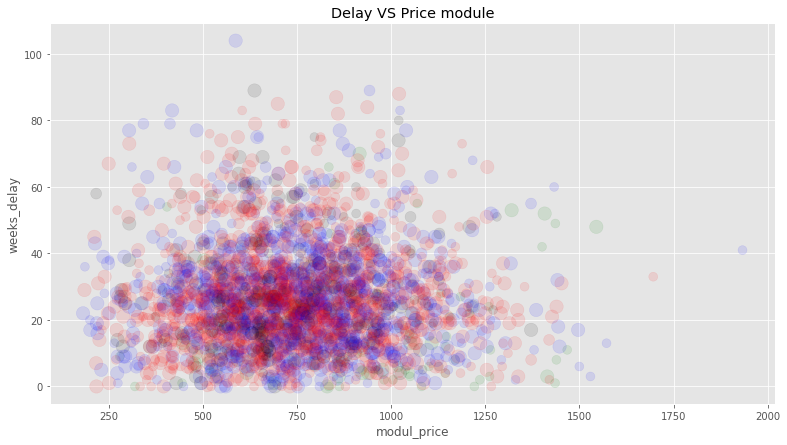

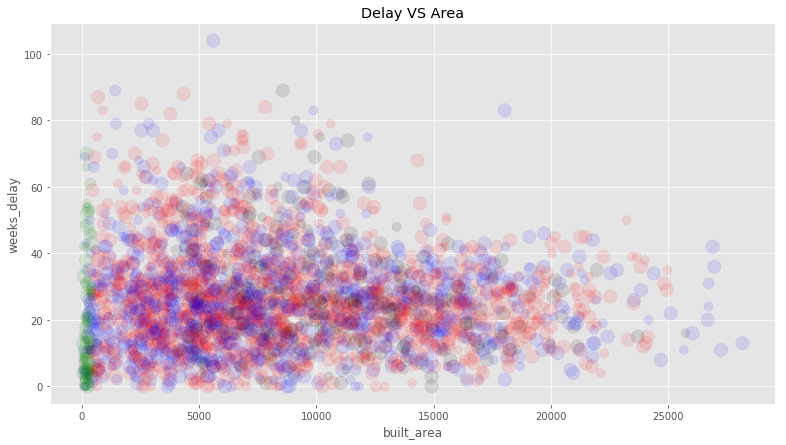

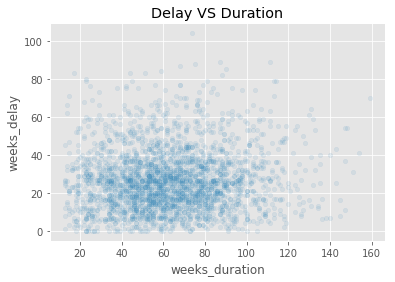

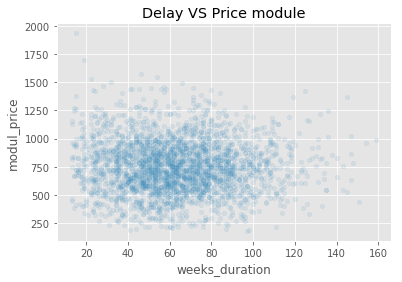

In [63]:
#Creamos una lista de colores según las tipologías de la columna "tipolog".

color= ['black' if l == "COMMERCIAL" else 'blue' if l == "OTHERS" else 'green' if l== "DETACHED" 
        else 'red' for l in const_tot["typology"]]

#Creating a list to assign size of the plots to a variable. 
#This case we will use the construction duration.
size= [20 if n < 13 else 80 if n <50 else 180 if n <100 else 120
         for n in const_tot["weeks_duration"]]

#Scatterplotting to see the distribution:
const_tot.plot.scatter(x='modul_price', y="weeks_delay", title="Delay VS Price module",
                       color=color, alpha=0.1,figsize=(13, 7),s=size)
const_tot.plot.scatter(x="built_area", y="weeks_delay", title="Delay VS Area",
                       color=color, alpha=0.1,figsize=(13, 7),s=size)
const_tot.plot.scatter(x="weeks_duration", y="weeks_delay", title="Delay VS Duration", alpha=0.1)
const_tot.plot.scatter(x="weeks_duration", y='modul_price', title="Delay VS Price module", alpha=0.1)

## Visualizing the Data:

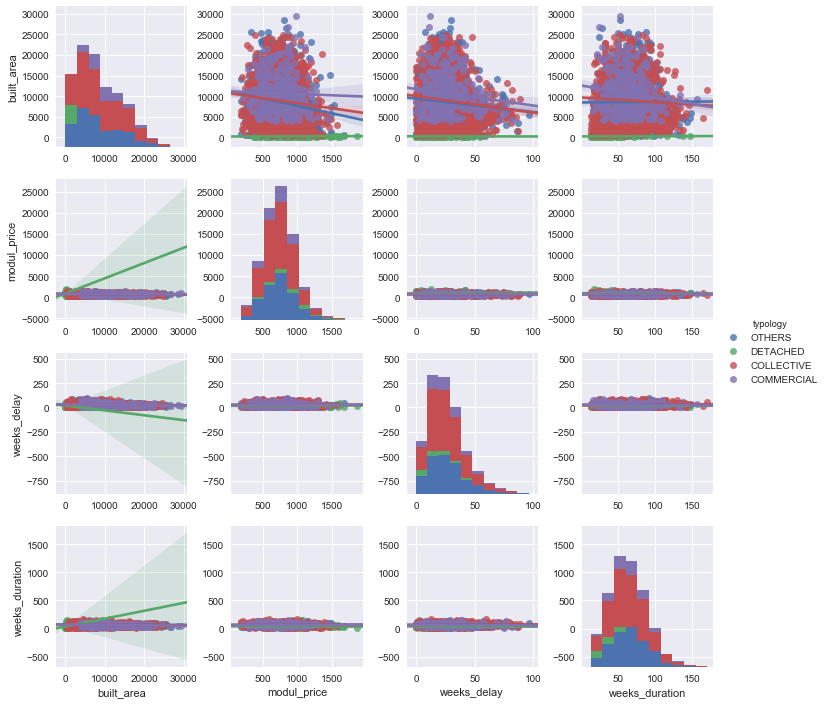

In [7]:
import seaborn as sns
sns.set()
sns.pairplot(const_tot, hue="typology",kind="reg")

In [7]:
list(np.unique(const_tot["typology"]))

['COLLECTIVE', 'COMMERCIAL', 'DETACHED', 'OTHERS']

In [8]:
#Let's see if everything is OK:
print(const_tot[["typology", "built_area"]].groupby(["typology"], as_index=False).max())
print(const_tot[["typology", "built_area"]].groupby(["typology"], as_index=False).describe())
print(const_tot.sample(10))

     typology    built_area
0  COLLECTIVE  24258.136569
1  COMMERCIAL  22444.670805
2    DETACHED    445.924823
3      OTHERS  33141.697232
  built_area                                                       \
       count          mean          std          min          25%   
0     1385.0   8673.627054  5540.868937   455.283467  4423.666839   
1      323.0  10318.574246  4211.133731  4035.114146  7192.031366   
2      130.0    257.586109   114.486398    51.101083   172.000603   
3      946.0   8884.885115  5944.596486    99.349526  4154.423148   

                                            
           50%           75%           max  
0  7393.889892  12396.967717  24258.136569  
1  9550.229494  13177.657373  22444.670805  
2   250.305104    353.049407    445.924823  
3  7473.328255  12827.015250  33141.697232  
        built_area  modul_price  weeks_delay  weeks_duration    typology
623    7186.888251   521.554202           25              78  COLLECTIVE
1189   5618.352370   401.6875

In [64]:
#One Hot Encoding (OHE) building typologies for better future processing:

detached=[1 if n =="DETACHED" else 0 for n in const_tot["typology"]]
collective=[1 if n =="COLLECTIVE" else 0 for n in const_tot["typology"]]
commercial=[1 if n =="COMMERCIAL" else 0 for n in const_tot["typology"]]
others=[1 if n =="OTHERS" else 0 for n in const_tot["typology"]]

const_OHE = pd.DataFrame()
const_OHE["DETACHED"]  = pd.Series(detached)
const_OHE["COLLECTIVE"] = pd.Series(collective)
const_OHE["COMMERCIAL"] = pd.Series(commercial)
const_OHE["OTHERS"]= pd.Series(others)

#One Hot Encoding (OHE) delays depending of the delays and the duration, assigning a threshold based in 
# the minimum proportion of 0.15 times the duration to consider it a TRUE delay:

def divide(x):
    return np.divide(x['weeks_delay'],x['weeks_duration'])

delays = pd.DataFrame()
delays = const_tot.apply(divide,axis=1)
const_OHE["DELAYED"] = [1 if n > 0.2  else 0 for n in delays]
const_OHE.sample(5)

,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
58,1,0,0,0,0
1597,0,1,0,0,1
2659,0,1,0,0,1
341,0,0,0,1,1
2016,0,1,0,0,0


In [14]:
#Checking de coherence of the new one hot encoded DF.
check_df = pd.concat([const_tot,const_OHE],axis=1)
check_df.head(5)

,built_area,modul_price,weeks_delay,weeks_duration,typology,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,479.824474,1262.006358,12,48,OTHERS,0,0,0,1,1
1,570.203511,598.460985,15,33,OTHERS,0,0,0,1,1
2,430.667301,538.320962,33,13,DETACHED,1,0,0,0,1
3,293.969490,1375.420593,3,43,DETACHED,1,0,0,0,0
4,119.308343,555.705567,22,22,OTHERS,0,0,0,1,1


In [65]:
#Concatenating main DF with the one hot encoded DF and dropping redundant columns:
## We will take frome here two dataframes for scaling the user inputs later in the GUI (means and std)

prepared_const = const_tot.drop(['typology','weeks_delay'],axis=1)
prepared_const = pd.concat([prepared_const,const_OHE],axis=1)
# prepared_const.mean().to_csv("./protomean_CSV")
# prepared_const.std().to_csv("./protostd_CSV")

In [68]:
prepared_const

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,732.258075,729.940173,69,0,1,0,0,0
1,128.265586,1436.129188,42,1,0,0,0,1
2,888.617513,999.617130,23,0,1,0,0,1
3,208.201187,1467.667735,28,1,0,0,0,1
4,199.909731,860.977718,55,1,0,0,0,0
5,429.968517,1207.816082,35,1,0,0,0,1
6,259.021388,976.727344,54,1,0,0,0,0
7,382.694585,830.860416,16,0,0,0,1,1
8,472.207703,1193.936614,27,0,0,0,1,1
9,68.381119,1051.216358,64,1,0,0,0,1


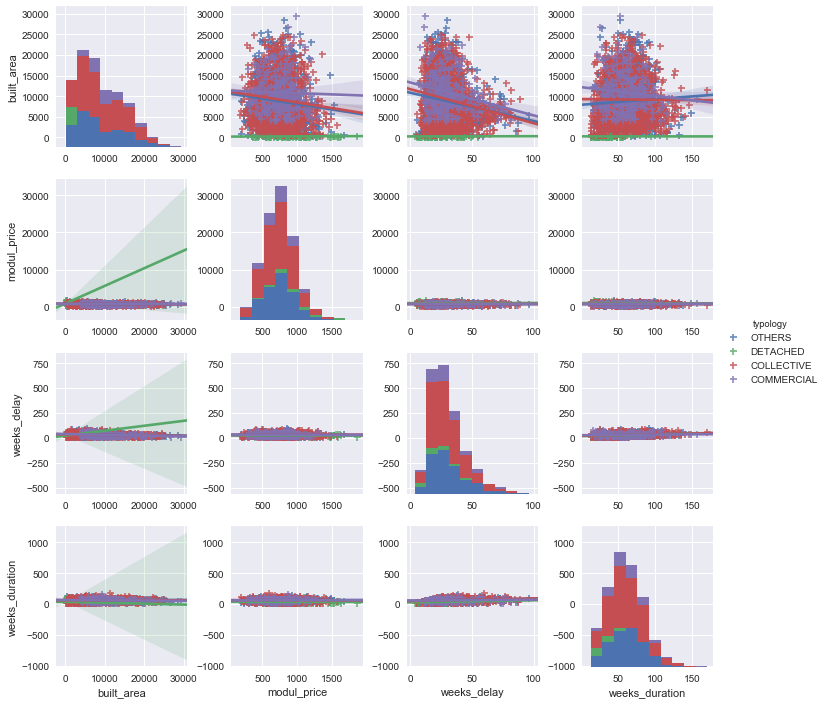

In [16]:
#Preview of the Data Set, looking for correlations. Let's filter the DF with the bigger grop of the target, 
#observations DELAYED = True.
preview_const = pd.concat([const_tot,const_OHE['DELAYED']],axis=1)
import seaborn as sns
sns.set()
sns.pairplot(const_tot[preview_const['DELAYED'] == 1], hue="typology",markers="+",kind="reg")

In [11]:
const_tot.describe()

,built_area,modul_price,weeks_delay,weeks_duration
count,2784.000000,2784.000000,2784.000000,2784.000000
mean,8543.268845,748.757130,25.956178,63.402299
std,5739.394225,229.512953,15.294083,24.583044
min,51.101083,187.490590,0.000000,13.000000
25%,4158.670688,588.187466,15.000000,46.000000
50%,7437.250538,741.084704,24.000000,63.000000
75%,12386.663076,896.094846,34.000000,80.000000
max,33141.697232,1708.230499,95.000000,206.000000


In [10]:
const_tot.head(3)

,built_area,modul_price,weeks_delay,weeks_duration,typology
0,357.179470,903.121282,29,52,DETACHED
1,98.263507,807.176627,28,14,DETACHED
2,614.603373,574.573241,1,69,COLLECTIVE


In [32]:
print(const_tot.mean())
print(const_tot['built_area'].std())

built_area        8543.268845
modul_price        748.757130
weeks_delay         25.956178
weeks_duration      63.402299
dtype: float64
5739.39422526544


In [31]:
const_tot.mean()['built_area']

8543.2688452521488

In [12]:
mean = const_tot['built_area'].mean()
std = const_tot['built_area'].std()
y =  98.263507

def uniq_stdscaler(i):
    x = (i - mean)/std
    return x

uniq_stdscaler(y)


-1.4806401717172322

In [19]:
mean = 8543.2
std =5739.39

def stdscaler(vector):
    for i in vector:        
        x = (i - mean)/std
        return x
x= stdscaler(const_tot['built_area'])
x

-1.373942405757868

In [33]:
prepared_const[]

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,-1.374200,1.543507,-0.545283,0,1,0,0,0
1,-1.393052,-0.097778,-0.708026,0,0,0,1,1
2,-1.392134,2.785151,-0.911454,0,1,0,0,1
3,-1.400120,0.963811,-1.806541,0,1,0,0,0
4,-1.354026,0.275659,-1.155569,0,0,0,1,1


## Feature scaling

In [18]:
prepared_const.head(3)

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,-1.374200,1.543507,-0.545283,0,1,0,0,0
1,-1.393052,-0.097778,-0.708026,0,0,0,1,1
2,-1.392134,2.785151,-0.911454,0,1,0,0,1


In [17]:
#Feature Scaling:
scaler = preprocessing.StandardScaler()

scaled_const = pd.DataFrame(scaler.fit_transform(
    prepared_const[['built_area', 'modul_price','weeks_duration']]),
                            columns= ['built_area', 'modul_price','weeks_duration'])
prepared_const = pd.concat([scaled_const,prepared_const.drop(['built_area', 'modul_price','weeks_duration'],axis=1)],
                        axis=1)
prepared_const.describe()

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
count,2.784000e+03,2.784000e+03,2.784000e+03,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,-9.279774e-17,3.731450e-16,6.552071e-17,0.046695,0.497486,0.116020,0.339799,0.799569
std,1.000180e+00,1.000180e+00,1.000180e+00,0.211024,0.500083,0.320307,0.473726,0.400395
min,-1.479894e+00,-2.445907e+00,-2.050655e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.640851e-01,-6.997361e-01,-7.080256e-01,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.927411e-01,-3.343517e-02,-1.636783e-02,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.697718e-01,6.420735e-01,6.752900e-01,0.000000,1.000000,0.000000,1.000000,1.000000
max,4.286663e+00,4.181227e+00,5.801695e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
prepared_const.to_csv("./prototrain_CSV")

In [57]:
prepared_const = pd.read_csv("./Data/prototrain_CSV")
prepared_const.head(3)

,Unnamed: 0,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,0,-1.436540,2.205662,-0.627210,0,0,0,1,1
1,1,-1.420652,-0.636344,-1.237346,0,0,0,1,1
2,2,-1.445182,-0.893928,-2.050862,1,0,0,0,1


In [16]:
#Let's split the dataset and train the model:
y = prepared_const['DELAYED']
X = prepared_const.loc[:,'built_area':'OTHERS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=1,stratify=y)

In [17]:
X.head(3)

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS
0,-1.436540,2.205662,-0.627210,0,0,0,1
1,-1.420652,-0.636344,-1.237346,0,0,0,1
2,-1.445182,-0.893928,-2.050862,1,0,0,0


In [19]:
list(prepared_const)

['built_area',
 'modul_price',
 'weeks_duration',
 'DETACHED',
 'COLLECTIVE',
 'COMMERCIAL',
 'OTHERS',
 'DELAYED']

In [18]:
y[y_test.index.values].head(5)

275     1
344     1
2355    1
10      1
1582    1
Name: DELAYED, dtype: int64

## Test and combination of ML models:
Due to the impossibility for the client (construction managers) most of the times, to manipulate every parameter in the construction project, it is useless to recomend global optimal parameters. So the nature of this problem force us to focus in local optima rather than on globals. So, we have to refine the models to avoid overfitting, but taking care of not "softening" the models too much. With the confussion matrix in mind, so we are open to have a model with many False Positives (of potentially delayed construction projects but finally not delayed). This way we won't take the risk of regularizing the models too much nd loosing valuable information.

In [22]:
#K-NEIGHBORS:
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)
y_pred_kn = knn.predict(X_test)
print("KNEIGHBORS REGRESSION MODEL: ")
print("Basic scoring: " +str(knn.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_kn)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_kn, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")

KNEIGHBORS REGRESSION MODEL: 
Basic scoring: 0.799043062201
Normalized accuracy: 0.799043062201
Net accuracy: 334 over 418 samples.


In [23]:
#Single prediction:
prediction = knn.predict([[7966.539337 ,952.116206, 71 ,0 , 1,0,0]])
prediction

array([1], dtype=int64)

In [24]:
#LOGISTIC:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)
print("LOGISTIC REGRESSION MODEL: ")
print("Basic scoring: " +str(logreg.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_lg)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_lg, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")


LOGISTIC REGRESSION MODEL: 
Basic scoring: 0.787081339713
Normalized accuracy: 0.787081339713
Net accuracy: 329 over 418 samples.


In [27]:
#RANDOM FOREST CLASSIF:
ranfor = RandomForestClassifier(max_depth=2, random_state=0)
ranfor.fit(X, y)
y_pred_rf = ranfor.predict(X_test)
print("RANDOM FOREST MODEL: ")
print("Basic scoring: " +str(ranfor.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_rf)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_rf, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")

RANDOM FOREST MODEL: 
Basic scoring: 0.801435406699
Normalized accuracy: 0.801435406699
Net accuracy: 335 over 418 samples.


# Evaluating ML tools performance and combination:
As we will see, the performance and predictions of random forest and logistic regression tools are similar, probably because of the scarcity of samples. We will combine these tools only to score the confidence of the prediction, as they will predict the same labels most of the times.

In [96]:
#Coincidence between models:
print("LOGIST VS RANDFOR: " +str(accuracy_score(y_pred_lg,y_pred_rf)))
print("LOGIST VS K-NEIGH: " +str(accuracy_score(y_pred_lg,y_pred_kn)))
print("RANDFOR VS K-NEIGH: " +str(accuracy_score(y_pred_rf,y_pred_kn)))

LOGIST VS RANDFOR: 0.990453460621
LOGIST VS K-NEIGH: 0.935560859189
RANDFOR VS K-NEIGH: 0.935560859189


# Observations disagreement between algorithms.

In [71]:
ykn = pd.DataFrame(y_pred_kn).rename(columns={0:"kn"})
ylg= pd.DataFrame(y_pred_lg).rename(columns={0:"lg"})
yrf= pd.DataFrame(y_pred_rf).rename(columns={0:"rf"})
y_concat = pd.concat([ykn,ylg,yrf],axis=1)

diff1 = y_concat['kn'] != y_concat['lg'] 
diff2 = y_concat['rf'] != y_concat['lg'] 

mask = y_concat[diff1 | diff2]

mask.sample(20)

,kn,lg,rf
397,1,0,1
0,0,1,1
140,0,1,1
214,0,1,1
59,0,1,1
245,0,0,1
359,1,0,1
251,1,0,1
99,0,1,1
339,0,1,1


In [72]:
prepared_const.loc[251]

built_area        7282.722635
modul_price        705.101774
weeks_duration     100.000000
DETACHED             0.000000
COLLECTIVE           1.000000
COMMERCIAL           0.000000
OTHERS               0.000000
DELAYED              1.000000
Name: 251, dtype: float64